In [17]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs

from scipy import stats
import datetime as dt

hv.notebook_extension()
%matplotlib inline

# Open MOD13A1 NetCDFs, Rename vars

In [21]:
ds_all=xr.open_mfdataset(
    '/g/data/oe9/project/team-drip/NDVI_EVI_MODIS_MDB/NDVI_stack/MOD13A1_NDVI_EVI_????.nc',
    chunks=dict(time=12, x=200,y=200)) 
mask = xr.open_dataset('/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY.nc')
ds_mask = ds_all.where(mask, drop=True)

ds_mask=ds_mask.rename({'__xarray_dataarray_variable__': 'ndvi_evi','y': 'lat', 'x': 'lon'})

# ds_mask['band'] = ('band', ['dayofyear', 'ndvi', 'evi'])
ds_mask


/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:25: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  elif np.issubdtype(dtype, int):


<xarray.Dataset>
Dimensions:   (band: 3, lat: 3147, lon: 3344, time: 388)
Coordinates:
  * band      (band) int64 1 2 3
  * lat       (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * lon       (lon) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time      (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi_evi  (time, band, lat, lon) float64 dask.array<shape=(388, 3, 3147, 3344), chunksize=(12, 3, 200, 199)>

In [25]:
# ds_mask.drop(['dayofyear'], dim='band')
ds_mask.drop(1, dim='band')

<xarray.Dataset>
Dimensions:   (band: 2, lat: 3147, lon: 3344, time: 388)
Coordinates:
  * band      (band) int64 2 3
  * lat       (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * lon       (lon) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time      (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi_evi  (time, band, lat, lon) float64 dask.array<shape=(388, 2, 3147, 3344), chunksize=(12, 2, 200, 199)>

In [19]:
ds_mask.ndvi_evi/10000
ds_mask.ndvi_evi.sel(band='dayofyear',time='2004-01').values


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [8]:
# # #  Save a dictionary into a pickle file.
# #  Save a dictionary into a pickle file.
# import pickle
# pickle.dump( ds_mask, open( "modis_ndvi_evi.p", "wb" ) )

# ds_mask = pickle.load( open( "modis_ndvi_evi.p", "rb" ) )

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


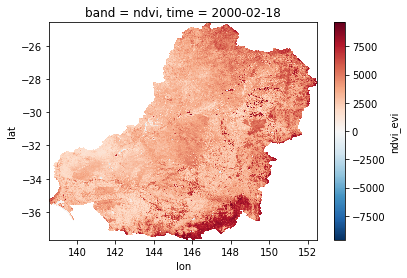

In [58]:
ds_mask.ndvi_evi.isel(time=0,band=1).plot()

In [59]:
ndvi7=ds_mask.ndvi_evi.sel(band='ndvi',time='2007')/10000
ndvi7.load()

<xarray.DataArray 'ndvi_evi' (time: 23, lat: 3147, lon: 3344)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
    band     <U9 'ndvi'
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * lon      (lon) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2007-01-01 2007-01-17 2007-02-02 ...

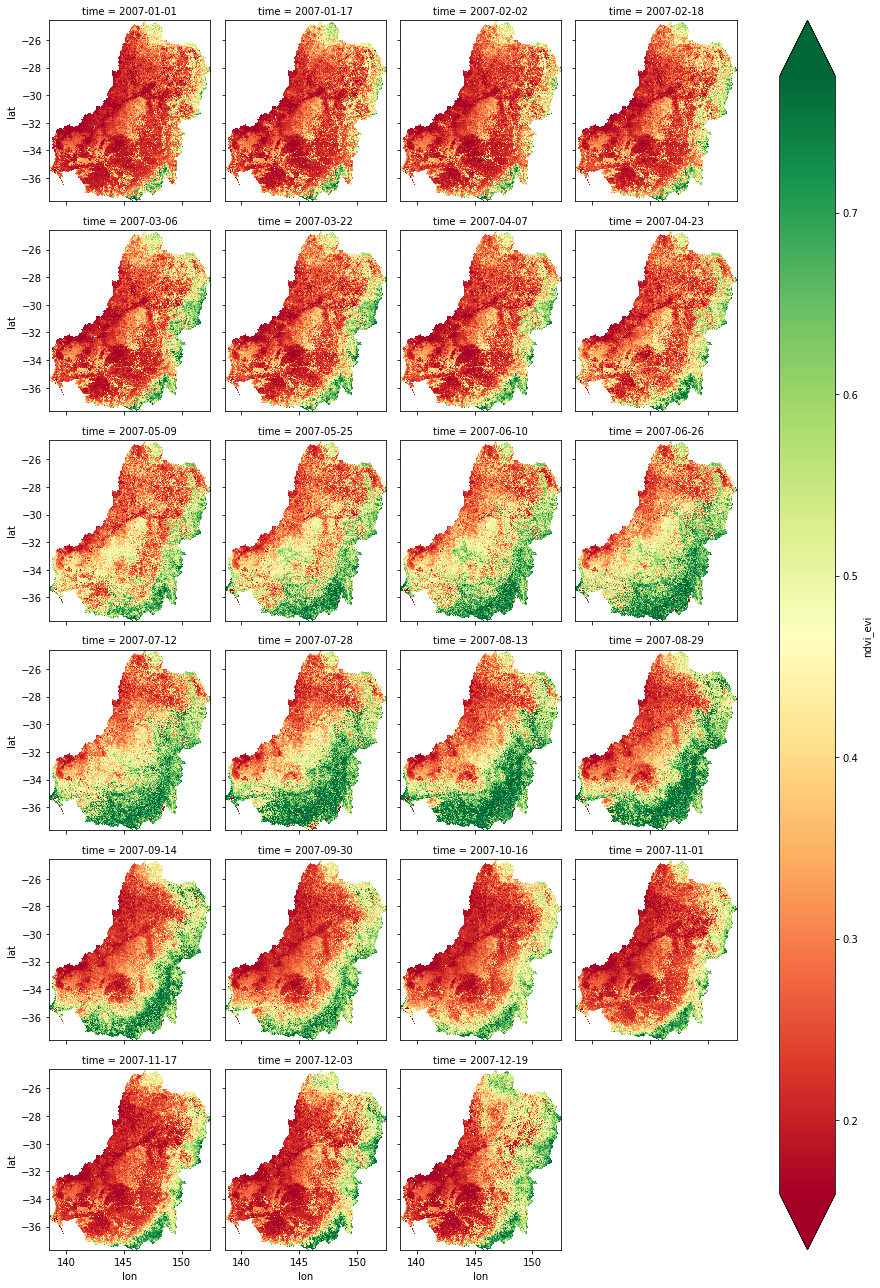

In [60]:
# select where NDVI is positive
ndvi_noneg = ndvi7.where(ndvi7>=0, np.nan)
ndvi_noneg.plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')

In [66]:
ndvi2=ndvi.where(ndvi.ndvi_evi>0)

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:25: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  elif np.issubdtype(dtype, int):


In [ ]:
ndvi2.min(dim=['lat','lon'])
ndvi2.load()

In [ ]:
ndvi2.min(dim=['lat','lon'])

In [50]:
# def nanneg(data):
#     return data(data<0)==np.nan

# xr.apply_ufunc(nanneg,ndvi)
ndvi_nn=ndvi.where(ndvi<0, np.nan)
#  y[np.array([0,2,4]), 1]

ndvi_nn

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'ndvi_evi' (time: 388, lat: 3147, lon: 3346)>
dask.array<shape=(388, 3147, 3346), dtype=float64, chunksize=(12, 200, 200)>
Coordinates:
    band     <U9 'ndvi'
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * lon      (lon) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Attributes:
    crs:        +init=epsg:4326
    res:        [0.00416201 0.00416201]
    is_tiled:   1
    transform:  [ 4.16200895e-03  0.00000000e+00  1.38565764e+02  0.00000000e...>